In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/dimitri/bin/")
import extractor
from IPython.display import HTML

In [2]:
# %load /home/dimitri/bin/jupyter_hide_code.txt
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


# Load the data

In [4]:
datafile = sqlite3.connect("data.sqlite")
data = extractor.get_partdata(datafile, "partie_PublicGoodGame_repetitions")
data.head()

,session,joueur,id,partie_partie_id,PGG_period,PGG_treatment,PGG_group,PGG_indiv,PGG_public,PGG_publicgroup,PGG_decisiontime,PGG_indivpayoff,PGG_publicpayoff,PGG_periodpayoff,PGG_cumulativepayoff
0,201801281904,201801281904_j_0,13,41,1,0,201801281904_g_3,1,19,50,0,1,25.0,26.0,26.0
1,201801281904,201801281904_j_0,33,41,2,0,201801281904_g_3,7,13,41,0,7,20.5,27.5,53.5
2,201801281904,201801281904_j_0,53,41,3,0,201801281904_g_3,3,17,45,0,3,22.5,25.5,79.0
3,201801281904,201801281904_j_0,73,41,4,0,201801281904_g_3,17,3,12,0,17,6.0,23.0,102.0
4,201801281904,201801281904_j_0,93,41,5,0,201801281904_g_3,13,7,30,0,13,15.0,28.0,130.0


## groupby

In [5]:
data_periods = data.groupby(data.PGG_period).mean()
data_groups = data.groupby(data.PGG_group).mean()
data_groups_periods = data.groupby([data.PGG_group, data.PGG_period]).mean()

<hr style="border-color: brown; height:1.2px;" />

## Average contribution by group

In [6]:
data_groups_averages = pd.DataFrame(data_groups.PGG_public)
data_groups_averages

,PGG_public
PGG_group,
201801281904_g_0,9.300
201801281904_g_1,8.750
201801281904_g_2,11.850
201801281904_g_3,8.675
201801281904_g_4,9.100


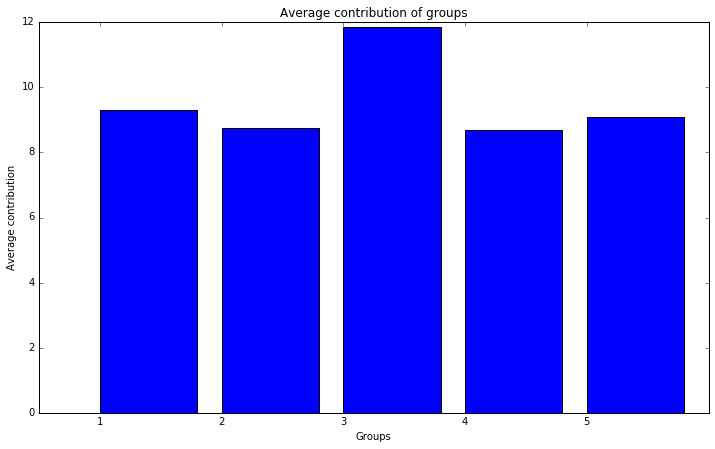

In [7]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
graph.bar(range(1, len(data_groups_averages.index)+1), data_groups_averages.PGG_public)
graph.set_xlim(0.5, len(data_groups_averages.index)+1)
graph.set_xticks(range(1, len(data_groups_averages.index)+1))
graph.set_xlabel("Groups")
graph.set_ylabel("Average contribution")
graph.set_title("Average contribution of groups");

## Evolution of average contribution over time

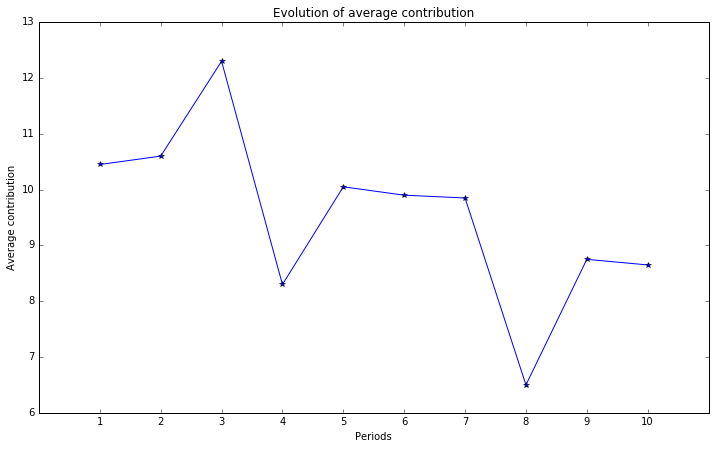

In [12]:
fig = plt.figure(figsize=(12, 7))

graph = fig.add_subplot(111)
graph.plot(np.unique(data.PGG_period), data_periods.PGG_public, "*b-")
graph.set_xlim(0, 11)
graph.set_xticks(range(1, 11))
graph.set_xlabel("Periods")
graph.set_ylabel("Average contribution")
graph.set_title("Evolution of average contribution");

### by group

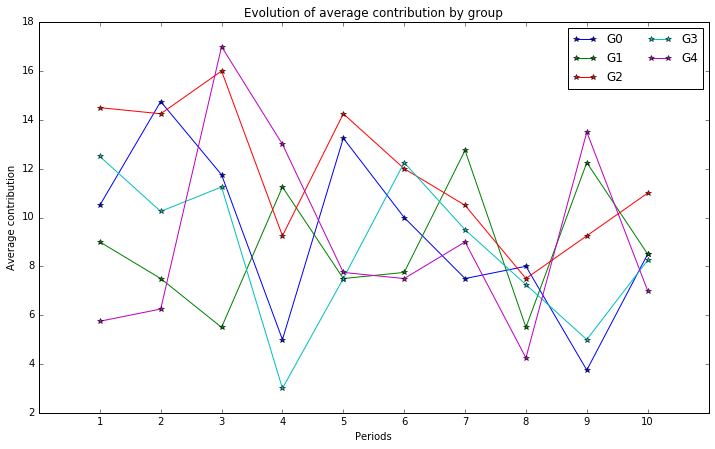

In [13]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
for g in np.unique(data.PGG_group):
    graph.plot(range(1, 11), data_groups_periods.loc[g].PGG_public, label="G{}".format(g.split("_")[2]), 
               marker="*")
graph.set_xlim(0, 11)
graph.set_xticks(range(1, 11))
graph.set_xlabel("Periods")
graph.set_ylabel("Average contribution")
graph.legend(loc="upper right", ncol=2)
graph.set_title("Evolution of average contribution by group");

## Frequency of each contribution level

In [14]:
data_frequencies = data.PGG_public.value_counts(normalize=True).reindex(range(0, 21))

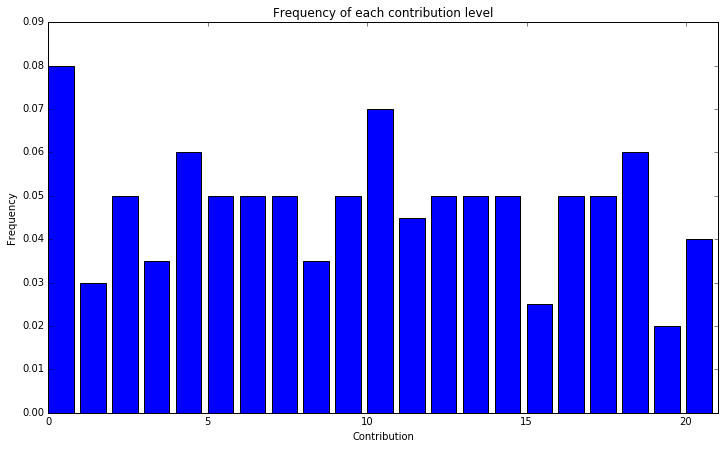

In [15]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
graph.bar(range(21), data_frequencies)
graph.set_xlim(0, 21)
graph.set_xlabel("Contribution")
graph.set_ylabel("Frequency")
graph.set_title("Frequency of each contribution level");

### by group

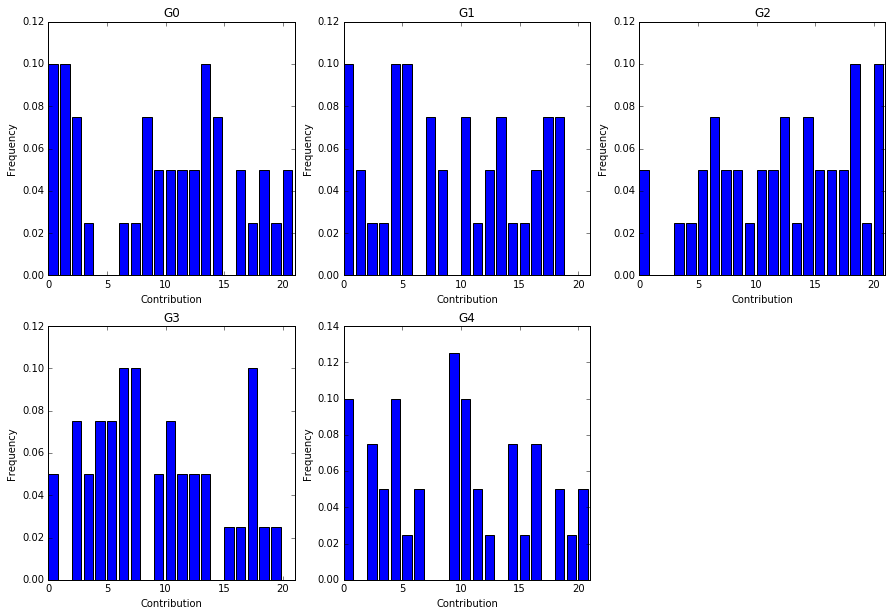

In [17]:
num_row = int(len(np.unique(data.PGG_group)) / 3) + int(len(np.unique(data.PGG_group))%3 > 0)
fig = plt.figure(figsize=(15, num_row * 5))

for i, g in enumerate(np.unique(data.PGG_group)):
    graph = fig.add_subplot(num_row, 3, i+1)
    tmp = data.loc[data.PGG_group == g, "PGG_public"]
    tmp2 = tmp.value_counts(normalize=True).reindex(range(21))
    graph.bar(range(21), tmp2)
    graph.set_xlim(0, 21)
    graph.set_xlabel("Contribution")
    graph.set_ylabel("Frequency")
    graph.set_title("G{}".format(g.split("_")[2]))